In [1]:
#Create time-related features

    #Examine whether the bicycle count shows any time-related patterns.
    #Extract features like hour, month etc. from the datetime column.
    #Plot small sections of the data (1 day, 1 week etc.)
    #Group by a time feature and observe grouped means


# EDA, and Modelling 


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
sns.set_style("darkgrid")

In [4]:
# Train File Data

df=pd.read_csv('train.csv', parse_dates=True)

df['datetime'] = pd.to_datetime(df['datetime'])

df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [5]:
# Test file Data

df_test=pd.read_csv(r'C:\Users\seun\Desktop\Spiced_Seun\Week3\test.csv')

df_test['datetime'] = pd.to_datetime(df_test['datetime'])

df_test.head(3)



,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000


In [6]:
df.isnull().sum()

df_test.isnull().sum()


datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [7]:
shapes=df.shape,df_test.shape

shapes

((10886, 12), (6493, 9))

# Pre-process the data set

To work well on the files, I splitted the datetime feature and subscequently apply feature engineering.



In [8]:
df['datetime'] = pd.to_datetime(df['datetime'])
df_test['datetime'] = pd.to_datetime(df_test['datetime'])


In [9]:

import datetime

df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month_name()
df['day'] = df['datetime'].dt.day
df['month_Number'] = df['datetime'].dt.month
df['hour'] = df['datetime'].dt.hour
df['dayofweek'] = df['datetime'].dt.dayofweek
df['date'] = df['datetime'].dt.date



df_test['year'] = df_test['datetime'].dt.year
df_test['month'] = df_test['datetime'].dt.month_name()
df_test['day'] = df_test['datetime'].dt.day
df_test['month_Number'] = df_test['datetime'].dt.month
df_test['hour'] = df_test['datetime'].dt.hour
df_test['dayofweek'] = df_test['datetime'].dt.dayofweek
df_test['date'] = df_test['datetime'].dt.date


# I dropped casual, registered, and count in "Train File".
# Because I want to predict count in the Test file, hence I develope my model excluding casual, registered, and count
#df = df.drop(['casual','registered', 'count'],axis=1)


In [10]:
df.set_index(df['date'], inplace=True)

In [11]:
df_test.set_index(df_test['date'], inplace=True)

In [12]:
df.head(4)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,month_Number,hour,dayofweek,date
date,,,,,,,,,,,,,,,,,,,
2011-01-01,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,January,1,1,0,5,2011-01-01
2011-01-01,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,January,1,1,1,5,2011-01-01
2011-01-01,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,January,1,1,2,5,2011-01-01
2011-01-01,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,January,1,1,3,5,2011-01-01


(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

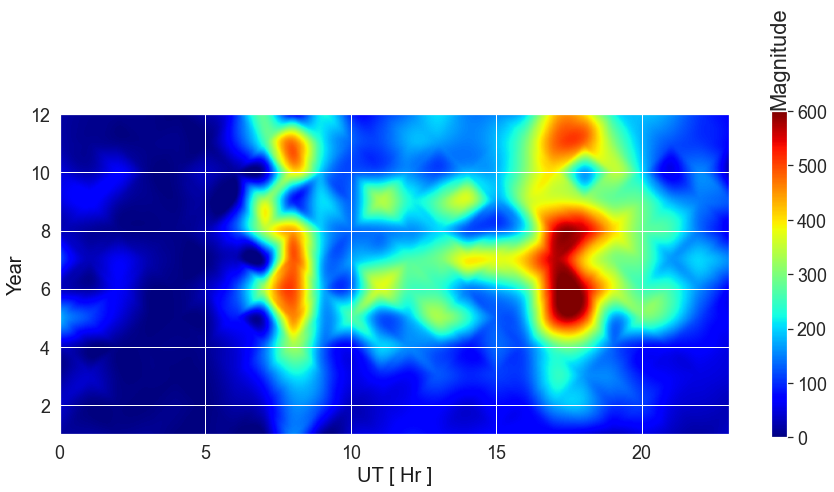

In [25]:
y=df['month_Number']
x=df['hour']
z=df['count']

ymax=df['month_Number'].max()
xmax=df['hour'].max()

ymin=df['month_Number'].min()
xmin=df['hour'].min()

zmax=df['count'].max()
zmin=df['count'].min()



import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
from scipy.interpolate import Rbf


xi = np.linspace(0, 23, 500)
yi = np.linspace(1, 12, 500)
xi, yi = np.meshgrid(xi, yi)

fig, (ax1) = plt.subplots(ncols=1,figsize=(15, 20))

# Interpolate; there's also method='linear' for 2-D data such as here
zi = scipy.interpolate.griddata((x, y), z, (xi, yi), method='cubic',fill_value = np.nan)

sc=plt.imshow(zi, vmin=z.min(), vmax=z.max(), origin='lower',
           extent=[x.min(), x.max(), y.min(), y.max()],cmap="jet")


cb = fig.colorbar(sc, shrink=0.3,orientation='vertical')
#cb = fig.colorbar(sc, shrink=0.3,orientation='horizontal')
plt.clim(0,600) 




cb.ax.tick_params(labelsize=18) 
cb.ax.set_title('Magnitude',fontsize=22,rotation=90)


plt.xlabel('UT [ Hr ]',fontsize=20,color='k')
plt.ylabel('Year',fontsize=20,color='k')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

In [18]:
vmax=z.max()
    
vmax   

977

In [12]:
df_test.head(4)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,month_Number,hour,dayofweek,date
date,,,,,,,,,,,,,,,,
2011-01-20,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,January,20,1,0,3,2011-01-20
2011-01-20,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,January,20,1,1,3,2011-01-20
2011-01-20,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,January,20,1,2,3,2011-01-20
2011-01-20,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,January,20,1,3,3,2011-01-20


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10886 entries, 2011-01-01 to 2012-12-19
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      10886 non-null  datetime64[ns]
 1   season        10886 non-null  int64         
 2   holiday       10886 non-null  int64         
 3   workingday    10886 non-null  int64         
 4   weather       10886 non-null  int64         
 5   temp          10886 non-null  float64       
 6   atemp         10886 non-null  float64       
 7   humidity      10886 non-null  int64         
 8   windspeed     10886 non-null  float64       
 9   casual        10886 non-null  int64         
 10  registered    10886 non-null  int64         
 11  count         10886 non-null  int64         
 12  year          10886 non-null  int64         
 13  month         10886 non-null  object        
 14  day           10886 non-null  int64         
 15  month_Number  10886 non-nul

# Create and train a Regression model to predict "count" 
  I use some selected features to do this. 
  
  First, create a data points for X and y from Train file

In [14]:
FEAUTURES = ['season','windspeed','humidity','dayofweek','temp', 'hour','month_Number','day','holiday','workingday']

# season','windspeed','humidity','dayofweek'
# Train Data
X = df[FEAUTURES]
y = df['count']


# Introducing some NaN values columns to make equal coloumns with Train data

df_test['casual'] = np.nan
df_test['registered'] = np.nan
df_test['count'] = np.nan


# Test Data
X_test = df_test[FEAUTURES]
y_test = df_test['count']

# season 	holiday 	workingday 	weather 	temp 	atemp 	humidity 	windspeed 	year 	month 	day 	month_Number 	hour 	dayofweek 	

# Creating smaller training and validation data sets.

# Craete split X and y data using "train_test_split" Function



In [15]:
from sklearn.model_selection import train_test_split


X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.25, random_state = 42)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((8164, 10), (2722, 10), (8164,), (2722,))

In [16]:
X_train.head(3)

,season,windspeed,humidity,dayofweek,temp,hour,month_Number,day,holiday,workingday
date,,,,,,,,,,
2011-07-11,3,12.9980,65,0,28.70,0,7,11,0,1
2012-05-18,2,22.0028,52,4,22.96,22,5,18,0,1
2011-04-01,2,6.0032,61,4,12.30,23,4,1,0,1


In [17]:
X_test.head(3)

,season,windspeed,humidity,dayofweek,temp,hour,month_Number,day,holiday,workingday
date,,,,,,,,,,
2011-01-20,1,26.0027,56,3,10.66,0,1,20,0,1
2011-01-20,1,0.0000,56,3,10.66,1,1,20,0,1
2011-01-20,1,0.0000,56,3,10.66,2,1,20,0,1


# Applying Feature Engineering


In [18]:
# now we have to treat categorical columns and numerical columns differently and seprately

categorical_feature_mask = X.dtypes==object
categorical_features = X.columns[categorical_feature_mask].tolist()
print(categorical_features)


numeric_feature_mask = X.dtypes!=object
numeric_features = X.columns[numeric_feature_mask].tolist()
print(numeric_features)

[]
['season', 'windspeed', 'humidity', 'dayofweek', 'temp', 'hour', 'month_Number', 'day', 'holiday', 'workingday']


In [19]:


import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification





In [20]:
F_transformation = ColumnTransformer(
    [
        
        ('scaler', MinMaxScaler(),['month_Number','holiday','humidity','day',]),
        ('do_nothing', 'passthrough', ['windspeed']),
        ("encoder1", OneHotEncoder(handle_unknown="ignore", sparse=False), ['season','workingday','dayofweek']),
        ('poly',PolynomialFeatures(degree=8), ["hour"]),
        ("scaler1", StandardScaler(), ['temp']),
       
                
    ]
)


#numerical = ['atemp', 'humidity', 'windspeed', 'day', 'hour']
#categorical = ['season', 'holiday', 'workingday', 'weather', 'weekday']


In [21]:
F_transformation

ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                 ['month_Number', 'holiday', 'humidity',
                                  'day']),
                                ('do_nothing', 'passthrough', ['windspeed']),
                                ('encoder1',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['season', 'workingday', 'dayofweek']),
                                ('poly', PolynomialFeatures(degree=8),
                                 ['hour']),
                                ('scaler1', StandardScaler(), ['temp'])])

In [22]:
F_transformation.fit_transform(X_train)

array([[ 5.45454545e-01,  0.00000000e+00,  6.50000000e-01, ...,
         0.00000000e+00,  0.00000000e+00,  1.08459702e+00],
       [ 3.63636364e-01,  0.00000000e+00,  5.20000000e-01, ...,
         2.49435789e+09,  5.48758735e+10,  3.48278575e-01],
       [ 2.72727273e-01,  0.00000000e+00,  6.10000000e-01, ...,
         3.40482545e+09,  7.83109853e+10, -1.01916997e+00],
       ...,
       [ 1.00000000e+00,  0.00000000e+00,  4.80000000e-01, ...,
         2.68435456e+08,  4.29496730e+09, -1.12435832e+00],
       [ 9.09090909e-02,  0.00000000e+00,  1.70000000e-01, ...,
         8.23543000e+05,  5.76480100e+06, -5.98416574e-01],
       [ 3.63636364e-01,  0.00000000e+00,  8.80000000e-01, ...,
         8.23543000e+05,  5.76480100e+06,  2.43090225e-01]])

In [23]:
X_train_Transform = F_transformation.fit_transform(X_train)

In [24]:
X_train_Transform=pd.DataFrame(X_train_Transform)

X_train_Transform



,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.545455,0.0,0.65,0.555556,12.9980,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,1.084597
1,0.363636,0.0,0.52,0.944444,22.0028,0.0,1.0,0.0,0.0,0.0,...,1.0,22.0,484.0,10648.0,234256.0,5153632.0,113379904.0,2.494358e+09,5.487587e+10,0.348279
2,0.272727,0.0,0.61,0.000000,6.0032,0.0,1.0,0.0,0.0,0.0,...,1.0,23.0,529.0,12167.0,279841.0,6436343.0,148035889.0,3.404825e+09,7.831099e+10,-1.019170
3,0.727273,0.0,0.60,0.833333,8.9981,0.0,0.0,1.0,0.0,1.0,...,1.0,9.0,81.0,729.0,6561.0,59049.0,531441.0,4.782969e+06,4.304672e+07,0.453467
4,0.090909,0.0,0.93,0.000000,12.9980,1.0,0.0,0.0,0.0,0.0,...,1.0,23.0,529.0,12167.0,279841.0,6436343.0,148035889.0,3.404825e+09,7.831099e+10,-1.545112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8159,0.000000,0.0,0.47,0.722222,11.0014,1.0,0.0,0.0,0.0,1.0,...,1.0,2.0,4.0,8.0,16.0,32.0,64.0,1.280000e+02,2.560000e+02,-1.755488
8160,1.000000,0.0,0.61,0.500000,19.0012,0.0,0.0,0.0,1.0,1.0,...,1.0,9.0,81.0,729.0,6561.0,59049.0,531441.0,4.782969e+06,4.304672e+07,-1.124358
8161,1.000000,0.0,0.48,0.944444,16.9979,0.0,0.0,0.0,1.0,1.0,...,1.0,16.0,256.0,4096.0,65536.0,1048576.0,16777216.0,2.684355e+08,4.294967e+09,-1.124358
8162,0.090909,0.0,0.17,1.000000,35.0008,1.0,0.0,0.0,0.0,1.0,...,1.0,7.0,49.0,343.0,2401.0,16807.0,117649.0,8.235430e+05,5.764801e+06,-0.598417


# Fitting a Linear Regression Model + Feature Engineering 

In [25]:
# Predictor is also refer to as model

Predictor=LinearRegression()

Predictor.fit(X_train_Transform,y_train)



LinearRegression()

In [26]:
X_valid_Transform = F_transformation.transform(X_valid)
X_valid_Transform = pd.DataFrame(X_valid_Transform)
X_valid_Transform




,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.545455,0.0,0.59,1.000000,0.0000,0.0,0.0,1.0,0.0,0.0,...,1.0,11.0,121.0,1331.0,14641.0,161051.0,1771561.0,1.948717e+07,2.143589e+08,1.715727
1,0.000000,1.0,0.54,0.833333,6.0032,1.0,0.0,0.0,0.0,1.0,...,1.0,6.0,36.0,216.0,1296.0,7776.0,46656.0,2.799360e+05,1.679616e+06,-2.071053
2,1.000000,0.0,0.48,0.555556,12.9980,0.0,0.0,0.0,1.0,1.0,...,1.0,18.0,324.0,5832.0,104976.0,1889568.0,34012224.0,6.122200e+08,1.101996e+10,-1.334735
3,0.636364,0.0,0.62,0.777778,12.9980,0.0,0.0,1.0,0.0,0.0,...,1.0,10.0,100.0,1000.0,10000.0,100000.0,1000000.0,1.000000e+07,1.000000e+08,1.189785
4,0.454545,0.0,0.53,0.777778,16.9979,0.0,1.0,0.0,0.0,0.0,...,1.0,23.0,529.0,12167.0,279841.0,6436343.0,148035889.0,3.404825e+09,7.831099e+10,0.663844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2717,0.181818,0.0,0.29,1.000000,27.9993,1.0,0.0,0.0,0.0,1.0,...,1.0,15.0,225.0,3375.0,50625.0,759375.0,11390625.0,1.708594e+08,2.562891e+09,0.032714
2718,0.000000,0.0,0.37,0.388889,19.9995,1.0,0.0,0.0,0.0,1.0,...,1.0,16.0,256.0,4096.0,65536.0,1048576.0,16777216.0,2.684355e+08,4.294967e+09,-0.493228
2719,0.545455,0.0,0.74,0.555556,8.9981,0.0,0.0,1.0,0.0,0.0,...,1.0,5.0,25.0,125.0,625.0,3125.0,15625.0,7.812500e+04,3.906250e+05,0.874220
2720,0.545455,0.0,0.65,0.833333,11.0014,0.0,0.0,1.0,0.0,1.0,...,1.0,8.0,64.0,512.0,4096.0,32768.0,262144.0,2.097152e+06,1.677722e+07,0.874220


In [27]:
Predictor.score(X_valid_Transform,y_valid),Predictor.score(X_train_Transform,y_train)

(0.5519110775860037, 0.5707584520996951)

In [28]:
Y_Predictions=Predictor.predict(X_valid_Transform)
Y_Predictions[1:50]


array([ 37.32007531, 356.17165175, 288.46399426, 174.45036682,
       194.96188199, 239.01354373, 334.79683274, 233.3513732 ,
       123.03894159, -42.66885652,  96.36921676, 223.91690804,
         9.09957971, 261.98950305,   9.16539476,  -1.28313181,
       187.81304237, 203.50868073,  88.63561403,  27.56411511,
       228.89496539,  19.00401489, 339.03495588,  -7.09818565,
       -34.04103579,   1.07609397,  67.20758176,  58.98081573,
       189.04844131, 425.84157339,  59.52412603, 324.33972863,
       348.91536373, 273.60593564, -29.44491113, 108.12025042,
       240.29994022, 180.8816509 , 398.51004921, 145.48424201,
       330.4374843 , 137.59330587, 192.51165493, 269.33962168,
        -2.48042928, -61.09792169, 315.44868711, 276.84301484,
        60.60106911])

In [29]:
print('Linear Regression results:')
print('Train R² score:', Predictor.score(X_train_Transform,y_train).round(3))
print('Test R² score:',Predictor.score(X_valid_Transform,y_valid).round(3))
print('MSE:',mean_squared_error(y_valid,Y_Predictions).round(3))

Linear Regression results:
Train R² score: 0.571
Test R² score: 0.552
MSE: 14703.608


In [30]:
## if we get negative values in Y_Pred_Neg (Predictions). Hence, we have to use log 
##To check for nagetive values:  Y_Pred_Neg=Y_Predictions[Y_Predictions<0]
## After implimenting log function, we get output: array([], dtype=float64)

# y_train_log=np.log1p(y_train)
# X_train.shape, X_valid.shape, y_train_log.shape, y_valid.shape
# Predictor.fit(X_train_Transform,y_train_log)
# Predictions=Predictor.predict(X_valid_Transform)
# Predictions=np.exp(Predictions)-1
# Predictions[Predictions<0]

##Predictor score

# np.sqrt(mean_squared_log_error(y_valid, Predictions))

_______________________________________________________________________________________________

# Fitting Regression Tree Model


* Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. 
* The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.
* When we use a DT to predict a number, it’s called a Regression Tree (RT). 
* When our goal is to group things into categories (=classify them), our decision tree is a classification tree.

In [31]:
from sklearn.tree import DecisionTreeRegressor

RT = DecisionTreeRegressor(min_samples_split=25, random_state=75)
RT_model = RT.fit(X_train, y_train)
RT_pred = RT_model.predict(X_valid)
RT_train = RT_model.predict(X_train)

In [32]:
RT_pred[1:50]

array([  6.5       , 167.82352941, 137.86666667, 188.75      ,
       144.76470588, 188.79166667, 425.18181818, 611.38095238,
       156.38888889,   7.91666667,  17.09090909, 260.64285714,
        59.        , 172.625     ,   7.81818182,  82.45      ,
        90.19047619, 181.45454545,  11.4375    ,  53.6       ,
       157.11764706,  14.53846154, 222.10526316,   7.08333333,
         1.68421053,  62.52941176,  31.91666667,  53.04166667,
        52.375     , 433.93333333,  75.625     , 317.61538462,
       500.47058824, 407.        ,   8.23809524,  77.7       ,
       440.23529412, 188.04166667, 430.72727273, 298.1875    ,
       109.66666667,  18.58823529, 217.42857143, 164.76190476,
         5.25      ,   4.7       , 299.2173913 , 262.56521739,
        50.875     ])

* Creating a RMSLE (Root Mean Squared) Log Error function.
* The function test is to check the quantity of error, the smaller the number the better.


In [33]:
def RMSLE(predictions, realizations):
    predictions_use = predictions.clip(0)
    rmsle = np.sqrt(np.mean(np.array(np.log(predictions_use + 1) - np.log(realizations + 1))**2))
    return rmsle

In [34]:
def PlotGraph(Y_test, RT_pred, limit, title):
    plt.figure(figsize= (10, 7))
    plt.plot(y_test[:limit], color = 'b')
    plt.plot(RT_pred[:limit], color = 'r')
    plt.title(title)
    plt.legend(['Test data', 'Predicted'])

In [35]:
print("The RMSLE fo the validation dataset is:", RMSLE(RT_pred, y_valid).round(3))
print("The RMSLE for train dataset is:", RMSLE(RT_train, y_train).round(3))

The RMSLE fo the validation dataset is: 0.462
The RMSLE for train dataset is: 0.353


In [36]:
pd.DataFrame(RT_model.feature_importances_, FEAUTURES)

,0
season,0.003288
windspeed,0.012103
humidity,0.049243
dayofweek,0.022886
temp,0.124488
hour,0.665584
month_Number,0.038808
day,0.012207
holiday,0.001201
workingday,0.070193


__________________________________________________________________________________

# Fitting Linear Regression (baseline) 

In [37]:
m = LinearRegression()

m.fit(X_train,y_train)

Ypred_ = m.predict(X_valid)

In [38]:
Ypred_ [1:50]

array([  5.86899205, 247.25831914, 255.26105529, 336.92189905,
       273.41103195, 237.18919272, 335.26115204, 137.02844198,
        51.69541139,  35.94192351,  89.19683202, 333.34014194,
       109.17746949, 295.87979587, 135.75297211, 117.91321685,
       229.64357396, 289.43272099, 168.88394907, 152.61484362,
       199.48130892, 111.55955471, 223.19512617,  86.18841487,
        60.06482095,  70.17836194, 123.26115108,  63.44381367,
       179.70946461, 378.432138  , 221.98805566, 252.99787283,
       266.63276776, 231.32977694,  27.53114692, 265.0524675 ,
       282.47924887, 267.7796653 , 275.38325504, 155.31601262,
       323.78488829, 119.45578163,  94.93769745, 135.03096589,
        18.68588676, -83.50349506, 327.73749039, 271.49919078,
       220.0630947 ])

In [39]:
print('Linear Regression (baseline) results:')
print('Train R² score:', m.score(X_train,y_train).round(3))
print('Test R² score:',m.score(X_valid,y_valid).round(3))
print('MSE:',mean_squared_error(y_valid,Ypred_).round(3))

Linear Regression (baseline) results:
Train R² score: 0.337
Test R² score: 0.333
MSE: 21880.991


* Plotting the actual y values versus the predicted y_values, to observe the graphical/visual correlation in the line plot

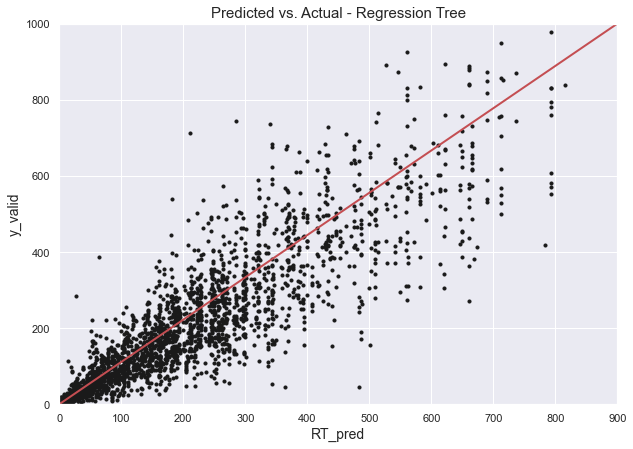

In [40]:
plt.figure(figsize=(10,7))
plt.scatter(RT_pred, y_valid,color='k', s=9.5)
plt.xlim(0, 900)
plt.ylim(0, 1000)
plt.plot([0, 900], [0, 1000], color='r', linestyle='-', linewidth=2)
plt.title("Predicted vs. Actual - Regression Tree", fontsize=15)
plt.xlabel("RT_pred", fontsize=14)
plt.ylabel("y_valid", fontsize=14)

plt.show()

___________________________________________________________________________________________________

# Fitting a Random Forest (RF) model

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

RF = RandomForestRegressor(n_estimators=500, max_features=4, min_samples_leaf=5, random_state=69, n_jobs=-1)
RF_model = RF.fit(X_train, y_train)
RF_pred = RF_model.predict(X_valid)
RF_train = RF_model.predict(X_train)

In [43]:
print("The RMSLE for validation dataset is:", RMSLE(RF_pred, y_valid))
print("The RMSLE for train dataset is:", RMSLE(RF_train, y_train))

The RMSLE for validation dataset is: 0.49472578914383514
The RMSLE for train dataset is: 0.42151598667447804


In [47]:
pd.DataFrame(RF_model.feature_importances_, FEAUTURES)

,0
season,0.030152
windspeed,0.021415
humidity,0.094184
dayofweek,0.039874
temp,0.131884
hour,0.578353
month_Number,0.048822
day,0.024132
holiday,0.000979
workingday,0.030205


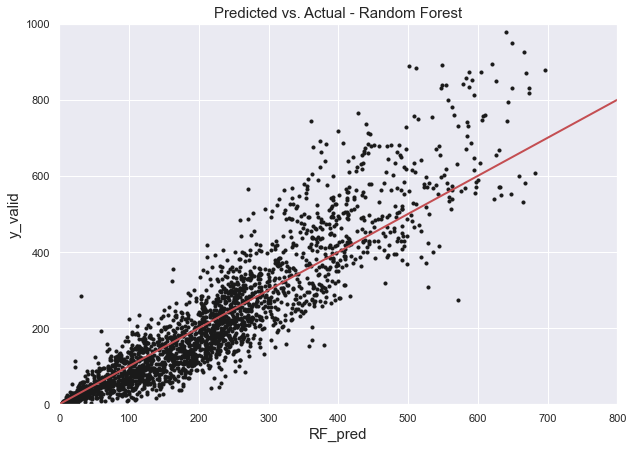

In [48]:
plt.figure(figsize=(10,7))
plt.scatter(RF_pred, y_valid, color='k', s=9.5)
plt.xlim(-0, 800)
plt.ylim(-0, 1000)
plt.plot([-100, 1200], [-100, 1200], color='r', linestyle='-', linewidth=2)
plt.title("Predicted vs. Actual - Random Forest", fontsize=15)
plt.xlabel("RF_pred", fontsize=15)
plt.ylabel("y_valid", fontsize=15)
plt.show()

# Making predictions on the test file data set

In [53]:
RT_model_retrain = RT.fit(X=X_train, y=y_train)
RT_pred_test = RT_model_retrain.predict(X_test)
RT_pred_test_clipped = pd.Series(RT_pred_test.clip(0))

In [54]:
RT_pred_test_clipped.shape

(6493,)

In [55]:
RF_model_retrain = RF.fit(X=X_train, y=y_train)
RF_pred_test = RF_model_retrain.predict(X_test)
RF_pred_test_clipped = pd.Series(RF_pred_test.clip(0))


In [56]:
RF_pred_test_clipped.shape

(6493,)

# Transfer result into CSV file format for Kaggle competition 

In [57]:
df_test.set_index(df_test['datetime'], inplace=True)

kaggle_submission = pd.DataFrame({'datetime': df_test.index, 'count': RT_pred_test_clipped})

kaggle_submission.to_csv('RT_kaggle_submission.csv', index= True)

kaggle_submission.head(5)


,datetime,count
0,2011-01-20 00:00:00,9.285714
1,2011-01-20 01:00:00,4.700000
2,2011-01-20 02:00:00,7.000000
3,2011-01-20 03:00:00,2.764706
4,2011-01-20 04:00:00,2.764706


In [58]:
kaggle_submission = pd.DataFrame({'datetime': df_test.index, 'count': RF_pred_test_clipped})

kaggle_submission.to_csv('RF_kaggle_submission.csv', index= True)

kaggle_submission.head(5)


,datetime,count
0,2011-01-20 00:00:00,19.541781
1,2011-01-20 01:00:00,12.003471
2,2011-01-20 02:00:00,10.374994
3,2011-01-20 03:00:00,8.348021
4,2011-01-20 04:00:00,8.276075


In [ ]:
def check_month(m):
    if m == 'January':
      return '1'
    elif m == 'Febraury':
      return '2'
    elif m == 'March':
      return '3'
    elif m == 'April':
      return '4'
    elif m == 'May':
      return '5'
    elif m == 'June':
      return '6'
    elif m == 'July':
      return '7'
    elif m == 'August':
      return '8'
    elif m == 'September':
      return '9'
    elif m == 'October':
      return '10'
    elif m == 'November':
      return '11'
    elif m == 'December':
      return '12'
    else:
      return '0'